In [37]:
#ElasticNet Method
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn import datasets


In [38]:
#Import Data and Extract Features and Dependend Variable
train = pd.read_csv('./data/train_clean_std_reduced.csv')
features = train.drop('SalePrice', axis = 1)
price = train['SalePrice'] 

In [39]:
#Cross Validate Elastic Model to Select Best alpha and rho


alphas = np.linspace(.0001, 1, 40)
rhos = np.linspace(0.01, 1, 30)
elastic_cv = ElasticNetCV(alphas = alphas, cv = 10, max_iter = 10000, normalize = False, l1_ratio = rhos)
elastic_cv.fit(features,price)
print('the best alpha is: %.5f' %(elastic_cv.alpha_))
print('the best rho is: %.5f' %(elastic_cv.l1_ratio_))


C:\Users\Joe Fritch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


the best alpha is: 0.02574
the best rho is: 0.38552


In [40]:
#Fit Model on complete test set using best alpha and l1_ratio and get R^2 score and print coeficients
elastic = ElasticNet()
elastic.set_params(normalize=False)
elastic = ElasticNet(alpha = elastic_cv.alpha_, l1_ratio = elastic_cv.l1_ratio_)
elastic.fit(features, price)
print('the R^2 Score is: %.2f' %(elastic.score(features, price)))
pd.Series(elastic.coef_, index=features.columns)


the R^2 Score is: 0.93


LotFrontage              0.009397
LotArea                  0.082936
OverallQual              0.184159
OverallCond              0.092807
YearBuilt                0.103054
YearRemodAdd             0.035578
MasVnrArea               0.009963
ExterQual                0.023339
ExterCond               -0.000000
BsmtQual                 0.007963
BsmtCond                -0.000000
HeatingQC                0.026257
GrLivArea                0.154809
BedroomAbvGr            -0.000000
KitchenAbvGr            -0.028375
KitchenQual              0.036200
TotRmsAbvGrd             0.000000
Fireplaces               0.026674
FireplaceQu              0.016631
GarageYrBlt              0.000000
GarageCars               0.044264
GarageArea               0.044081
GarageQual               0.013857
GarageCond               0.000000
WoodDeckSF               0.000000
OpenPorchSF              0.000000
3SsnPorch               -0.000000
ScreenPorch              0.006720
PoolQC                   0.005238
YrSold        

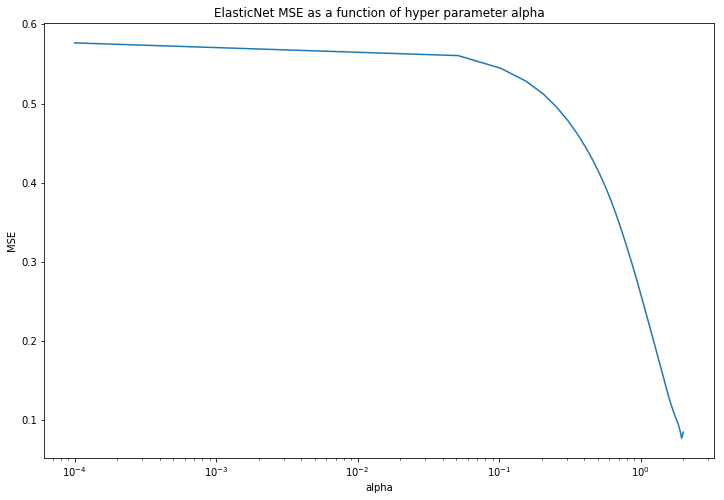

In [36]:
mse = elastic_cv.mse_path_.copy()
mse1d = mse[7,:,5]

df_coef = pd.DataFrame(mse1d, index=alphas)
title = 'ElasticNet MSE as a function of hyper parameter alpha'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.gca().get_legend().remove()
fig = plt.gcf().set_size_inches(12,8)
plt.show()

In [41]:
test = pd.read_csv('./data/test_clean_std_reduced.csv')
train_pre_stand = pd.read_csv("./data/train.csv")
submission = pd.read_csv("./data/sample_submission.csv")
sale_price_pred = elastic.predict(test)
submission['SalePrice'] = sale_price_pred
submission.head()

,Id,SalePrice
0,1461,-0.871779
1,1462,-0.131017
2,1463,0.173380
3,1464,0.431749
4,1465,0.502416


In [42]:
#inverse transform
from sklearn.preprocessing import StandardScaler
#Re-Train Scaler
scaler = StandardScaler()
scaler = scaler.fit(np.log(train_pre_stand[['SalePrice']])) 


# inverse transform on transformed price
submission['SalePrice'] = np.exp(scaler.inverse_transform(submission['SalePrice'])).round(1)
submission.to_csv("./data/elastic_submission.csv",index = False)

In [43]:
submission['SalePrice'].head()

0    117704.9
1    158218.7
2    178667.9
3    198085.6
4    203754.9
Name: SalePrice, dtype: float64

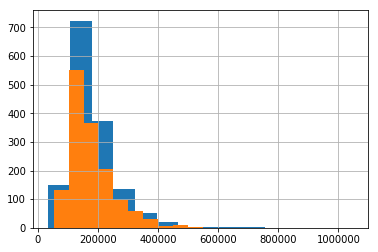

In [44]:
train_pre_stand['SalePrice'].hist()
submission['SalePrice'].hist(bins=20)
#train_pre_stand['SalePrice'].hist()

In [11]:
alphas_elastic = np.logspace(-2, 4, 1000)
coef_elastic = []
elastic = ElasticNet()
from sklearn import linear_model

In [12]:
for i in alphas_elastic:
    elastic = linear_model.ElasticNet(l1_ratio =0.25)
    elastic.set_params(alpha = i)
    elastic.fit(features, price)
    coef_elastic.append(elastic.coef_)

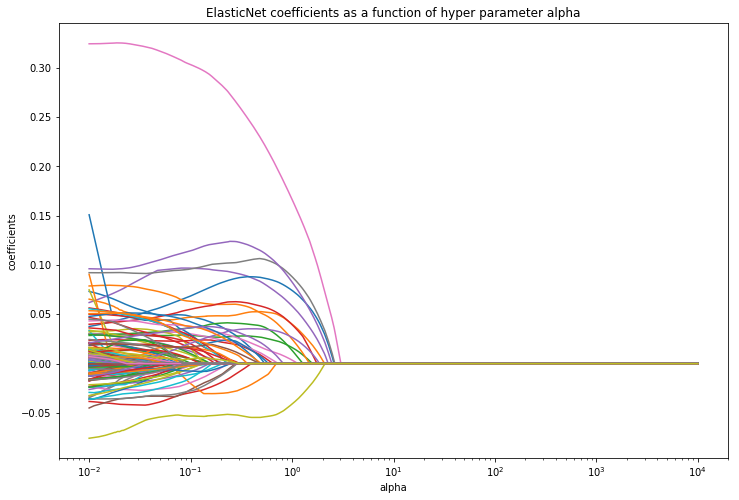

In [14]:
df_coef = pd.DataFrame(coef_elastic, index=alphas_elastic)
title = 'ElasticNet coefficients as a function of hyper parameter alpha'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.gca().get_legend().remove()
fig = plt.gcf().set_size_inches(12,8)
plt.show()

NameError: name 'mse_path_' is not defined